#### Sarima Model

##### Train Test Split

##### Model Training 

##### Performance Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv("data21125.csv", index_col='Date', parse_dates = True)

In [5]:
df1 = df["Mean-value"]

<Axes: title={'center': 'Currency Price Over time'}, xlabel='Date'>

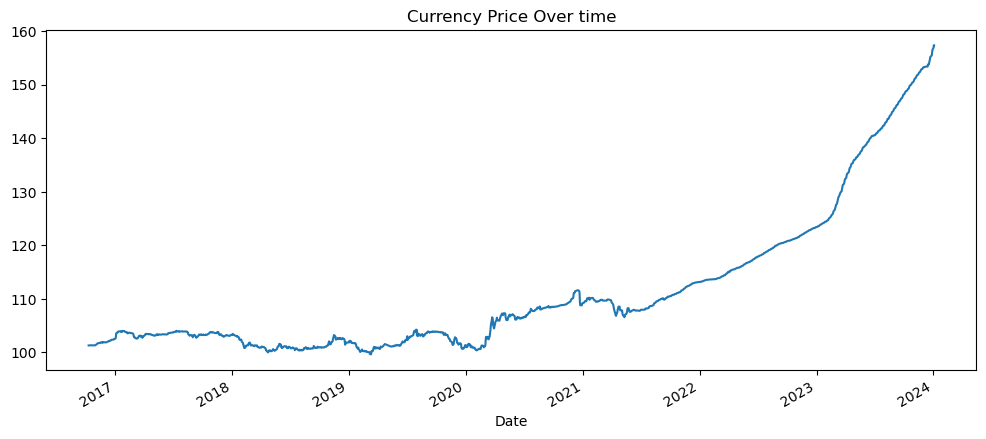

In [7]:
df1.plot(title="Currency Price Over time", figsize=(12,5))

#### Splitting the data

In [11]:
train_size = int(len(df1)*0.8)
train, test = df1[:train_size], df1[train_size:]

In [13]:
train

Date
2016-10-11    101.28
2016-10-13    101.30
2016-10-13    101.30
2016-10-13    101.30
2016-10-13    101.30
               ...  
2022-07-14    118.23
2022-07-15    118.27
2022-07-18    118.33
2022-07-19    118.39
2022-07-20    118.45
Name: Mean-value, Length: 1442, dtype: float64

In [15]:
test

Date
2022-07-21    118.52
2022-07-22    118.57
2022-07-25    118.62
2022-07-26    118.66
2022-07-27    118.72
               ...  
2023-12-28    156.09
2023-12-29    156.46
2024-01-02    156.99
2024-01-02    157.32
2024-01-03    157.32
Name: Mean-value, Length: 361, dtype: float64

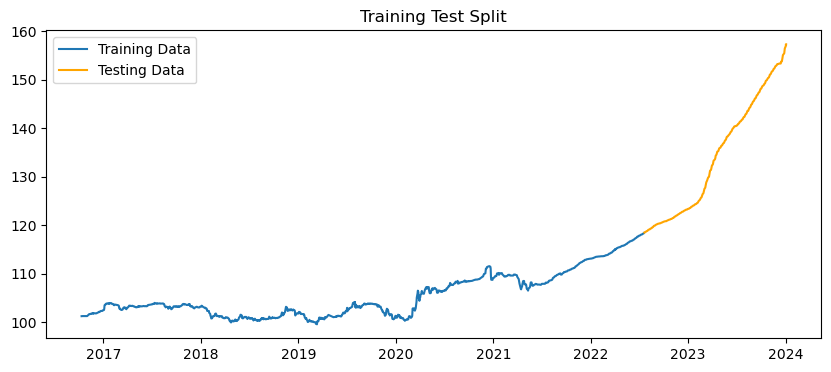

In [19]:
#plotting the split

plt.figure(figsize=(10,4))
plt.plot(train, label="Training Data")
plt.plot(test, label="Testing Data", color="orange")
plt.legend()
plt.title("Training Test Split")
plt.show()

#### Traning the model 

In [30]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_model = model.fit()

print(sarima_model.summary())

C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Mean-value   No. Observations:                 1442
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 649.788
Date:                            Tue, 21 Jan 2025   AIC                          -1289.577
Time:                                    16:49:06   BIC                          -1263.253
Sample:                                         0   HQIC                         -1279.746
                                           - 1442                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2981      0.041      7.335      0.000       0.218       0.378
ma.L1          0.0205      0.041   

C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HomePC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


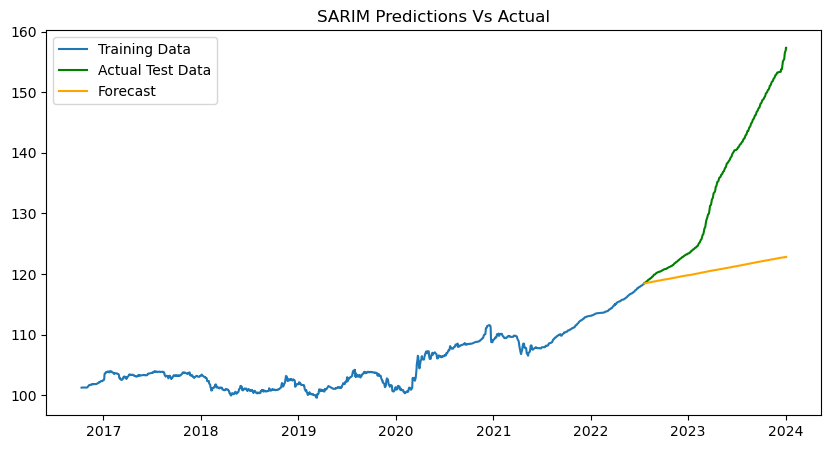

In [34]:
forecast = sarima_model.forecast(steps=len(test))

plt.figure(figsize=(10,5))
plt.plot(train, label="Training Data")
plt.plot(test, label = "Actual Test Data", color='green')
plt.plot(test.index, forecast, label="Forecast", color='orange')
plt.legend()
plt.title('SARIM Predictions Vs Actual')
plt.show()

#### Evaluating Performance

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = mse**0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 13.45739178452893
Mean Squared Error (MSE): 295.26964883076937
Root Mean Squared Error (RMSE): 17.183412025286753
